In [13]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/ubuntu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ubuntu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
import gensim
import pyLDAvis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pyLDAvis import gensim as pgensim
from nltk.tokenize import word_tokenize

In [46]:
stop=set(nltk.corpus.stopwords.words('russian'))
stop.add("это")
list(stop)[:10]

['же', 'совсем', 'более', 'может', 'один', 'надо', 'нее', 'какой', 'из', 'ему']

In [47]:
df = pd.read_csv("train.csv")

In [48]:
def preprocess_news(df):
    corpus=[]
    stem=nltk.stem.PorterStemmer()
    for news in df['Content']:
        words=[w for w in word_tokenize(news) if (w not in stop and w.isalpha() and len(w) > 2)]
        corpus.append(words)
    return corpus

corpus=preprocess_news(df)

In [49]:
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [52]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 10,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.008*"ВСУ" + 0.006*"США" + 0.005*"боеприпасы" + 0.005*"Украине" + 0.005*"боеприпасов" + 0.004*"кассетных" + 0.004*"Украины" + 0.003*"Украину" + 0.003*"кассетные" + 0.003*"территории"'),
 (1,
  '0.007*"ВСУ" + 0.004*"украинских" + 0.004*"также" + 0.004*"районе" + 0.003*"жалко" + 0.003*"сколько" + 0.003*"войска" + 0.003*"обороны" + 0.003*"области" + 0.003*"боевых"'),
 (2,
  '0.004*"ВСУ" + 0.004*"Республики" + 0.003*"Народной" + 0.003*"направлении" + 0.003*"противника" + 0.003*"Донецкой" + 0.003*"районе" + 0.003*"области" + 0.003*"районах" + 0.002*"населенных"'),
 (3,
  '0.008*"ВСУ" + 0.006*"районе" + 0.005*"направлении" + 0.003*"противника" + 0.003*"также" + 0.002*"армии" + 0.002*"группировки" + 0.002*"Зеленский" + 0.002*"действий" + 0.002*"тысяч"'),
 (4,
  '0.007*"ВСУ" + 0.005*"районе" + 0.003*"наши" + 0.003*"направлении" + 0.003*"АЭС" + 0.003*"противника" + 0.002*"видео" + 0.002*"Как" + 0.002*"Если" + 0.002*"области"'),
 (5,
  '0.008*"бригада" + 0.007*"ВСУ" + 0.003*"которые" + 

In [53]:
pyLDAvis.enable_notebook()
vis = pgensim.prepare(lda_model, bow_corpus, dic)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.062843 -0.168067       1        1  12.989952
1      0.144632  0.068863       2        1  12.058499
2      0.048451  0.089042       3        1  11.860441
8     -0.061924 -0.027022       4        1  10.263154
4     -0.025185  0.014880       5        1  10.194251
6      0.019714 -0.008819       6        1  10.174398
3      0.002414  0.025707       7        1   9.240099
7     -0.144023  0.026874       8        1   9.042818
9     -0.009119 -0.064127       9        1   8.121475
5     -0.037803  0.042670      10        1   6.054913, topic_info=           Term        Freq       Total Category  logprob  loglift
3056    бригада   23.000000   23.000000  Default  30.0000  30.0000
1074        США   78.000000   78.000000  Default  29.0000  29.0000
162         ВСУ  230.000000  230.000000  Default  28.0000  28.0000
418   кассетных   26.000000   26.000000  Default  27.0000  27.0000
42        жалко   17.000000   17.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
7         наших    2.600719   38.923070  Topic10  -6.7778   0.0985
129     Украины    2.553425   79.872622  Topic10  -6.7961  -0.6387
197     который    2.531617   35.989618  Topic10  -6.8047   0.1499
381       атаки    2.524497   32.354112  Topic10  -6.8075   0.2536
47          руб    2.519900   13.143802  Topic10  -6.8093   1.1526

[756 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
13144      5  0.688920       FPV
6124       9  0.723120       PDA
4378       1  0.606590       The
4378       2  0.202197       The
4378       8  0.101098       The
...      ...       ...       ...
98         4  0.188602  является
98         5  0.062867  является
98         6  0.125735  является
98         8  0.062867  является
98         9  0.314337  является

[1832 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 9, 5, 7, 4, 8, 10, 6])

In [100]:
from umap import UMAP
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [79]:
sentence_model = SentenceTransformer("ai-forever/sbert_large_nlu_ru")
bertopic_model = BERTopic()

pytorch_model.bin:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/323 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.78M [00:00<?, ?B/s]

No sentence-transformers model found with name /home/ubuntu/.cache/torch/sentence_transformers/ai-forever_sbert_large_nlu_ru. Creating a new one with MEAN pooling.


In [101]:
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)
vectorizer_model = CountVectorizer(stop_words="english")

In [102]:
embeddings = sentence_model.encode(docs, show_progress_bar=True)
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)

Batches:   0%|          | 0/19 [00:00<?, ?it/s]

In [103]:
topic_model = BERTopic(
    embedding_model=sentence_model,
    umap_model=umap_model, 
    vectorizer_model=vectorizer_model, 
    calculate_probabilities=True,
    nr_topics=40
)
topics, probs = topic_model.fit_transform(df["Content"], embeddings)

In [107]:
topic_model = BERTopic(embedding_model=sentence_model, umap_model=umap_model,\
                       vectorizer_model=vectorizer_model, calculate_probabilities=True, nr_topics=40)
topics, probs = topic_model.fit_transform(docs, embeddings)

In [108]:
topic_model.visualize_documents(docs, reduced_embeddings=reduced_embeddings, 
                                hide_document_hover=True, hide_annotations=True)

In [110]:
new_topics = topic_model.reduce_outliers(df["Content"], topics, probabilities=probs, 
                             threshold=0.05, strategy="probabilities")
topic_model.update_topics(docs, topics=new_topics)

2023-12-15 11:23:55,003 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


In [111]:
topic_model.update_topics(docs, topics=new_topics)

2023-12-15 11:24:00,259 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


In [112]:
topic_model.visualize_documents(docs, reduced_embeddings=reduced_embeddings, 
                                hide_document_hover=True, hide_annotations=True)

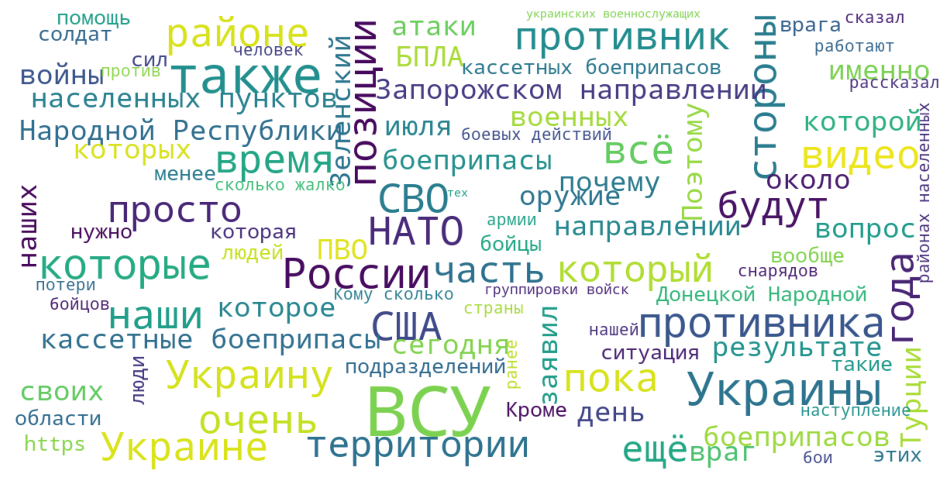

In [69]:
import itertools
from wordcloud import WordCloud, STOPWORDS

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stop,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(", ".join(list(itertools.chain(*data))))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)